In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import os
from mlflow.tracking import MlflowClient

In [3]:
#setting the username and password of mlflow server
os.environ['MLFLOW_TRACKING_USERNAME'] = 'mlflow'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'fusemlflow'
mlflow.tracking.set_tracking_uri('http://mlflow.fusemachines.com/')

In [4]:
#getting experiment from mlflow server using experiment id
experiment = MlflowClient(tracking_uri='http://mlflow.fusemachines.com/').get_experiment(19)

In [5]:
#getting experiment from mlflow server using experiment id
experiment1 = MlflowClient(tracking_uri='http://mlflow.fusemachines.com/').get_experiment(17)

In [6]:
#using it to make it in dataframe form
df = mlflow.search_runs(experiment.experiment_id)

In [7]:
#using it to make it in dataframe form
df1 = mlflow.search_runs(experiment1.experiment_id)

In [8]:
for i in range(df.shape[0]):
    df.loc[i,'start_time'] = str(df.loc[i,'start_time'])[0:10]

In [9]:
for i in range(df1.shape[0]):
    df1.loc[i,'start_time'] = str(df1.loc[i,'start_time'])[0:10]

In [10]:
#grouping by week to get best metric in that week
df_grouping = df['metrics.acc_weighted_mean'].groupby(df['start_time']).max()

In [11]:
df_grouping = df_grouping.fillna(0)

In [12]:
df = pd.DataFrame(df_grouping)
#df

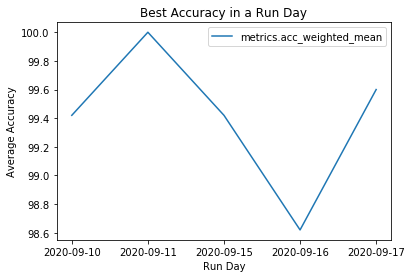

In [13]:
fig = sns.lineplot(data=df)
plt.xlabel("Run Day")
plt.ylabel("Average Accuracy")
plt.title("Best Accuracy in a Run Day")
plt.show()

In [14]:
#grouping by week to get best metric in that week
df_grouping1 = df1['metrics.avg-f1-score'].groupby(df1['start_time']).max()

In [15]:
df_grouping1 = df_grouping1.fillna(0)

In [16]:
df1 = pd.DataFrame(df_grouping1)
#df1

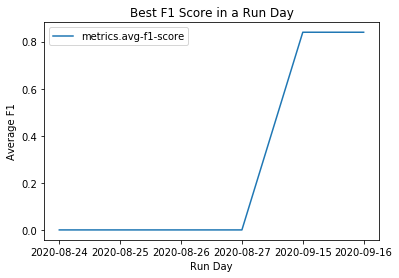

In [17]:
fig = sns.lineplot(data=df1)
plt.xlabel("Run Day")
plt.ylabel("Average F1")
plt.title("Best F1 Score in a Run Day")
plt.show()